In [35]:
import pandas as pd       # para operar sobre dataframes
import matplotlib.pyplot as plt
import numpy as np        # para manipular vetores e realizar operações
import tensorflow as tf
from sklearn.preprocessing import StandardScaler # para escalonar os dados
from sklearn.metrics import mean_absolute_error, mean_squared_error # para obter métricas do modelo

# Regressão simples na prática

Aplicando a regressão em um banco de dados obtido pela kaggle, chamada "House Sales in King County, USA". Pode ser obtida pelo link: https://www.kaggle.com/harlfoxem/housesalesprediction


In [2]:
# Lendo o banco de dados
base = pd.read_csv("house_price.csv")

# Para confirmarmos se está tudo certo com o banco olhamos o começinho dele.
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Encontrando a de linha em cada atributo
base.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [4]:
# Encontrando as dimensões do banco de dados
base.shape

(21613, 21)

In [5]:
# obtendo as variaveis de interesse 
metros_quadrados = base.iloc[:, 5].values # obtem todos os valores que estão na coluna de índice 5 (: -> todas as linhas)
metros_quadrados 

array([1180, 2570,  770, ..., 1020, 1600, 1020], dtype=int64)

In [6]:
metros_quadrados.shape # analizando as dimensões

(21613,)

In [7]:
# para colocarmos na regressão precisamos de um formato (1,1) pelo menos, então vamos converter (21613,) em (21613,1)
metros_quadrados = metros_quadrados.reshape(-1,1) # -1 indica que não será alterada a quantidade de linhas
metros_quadrados.shape

(21613, 1)

In [8]:
# Obtendo os preços (que será o que queremos prever)
preco = base.iloc[:, 2:3] # obtem a coluna de índice 2 do dataset e todas as suas linhas

preco.shape 

(21613, 1)

  Quando obtemos a coluna com base.iloc[:, 2:3] note que não precisamos utilizar o reshape pois as dimensões já estão corretas.

Agora vamos normalizar os dados de interesse para podermos passar para a regressão.


In [9]:
scaler_metros = StandardScaler()
scaler_precos = StandardScaler()

precos_escalados = scaler_precos.fit_transform(preco)
metros_escalados = scaler_metros.fit_transform(metros_quadrados)

In [14]:
# Visualizando os dados escalonados
print("Preços normalizados\n", precos_escalados)
print("\nMetros quadrados normalizados\n", metros_escalados)

Preços normalizados
 [[-0.86671733]
 [-0.00568792]
 [-0.98084935]
 ...
 [-0.37586519]
 [-0.38158814]
 [-0.58588173]]

Metros quadrados normalizados
 [[-0.97983502]
 [ 0.53363434]
 [-1.42625404]
 ...
 [-1.15404732]
 [-0.52252773]
 [-1.15404732]]


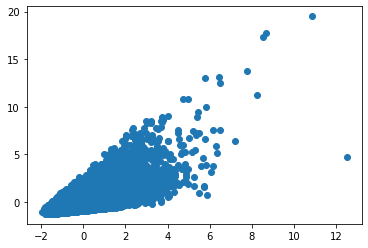

In [17]:
%matplotlib inline
plt.scatter(metros_escalados, precos_escalados) 

**Sabemos que a fórmula da regressão linear é:**

y = b0 + b1*x1

Portanto, vamos otimizar b0 e b1 e depois realizar a predição.

In [19]:
# Primeiro vamos chutar valor para b0 e b1
np.random.seed(1) # permite reprodução do mesmo número aleatório
np.random.rand(2) # dois números aleatórios

# Então iremos utilizar variáveis do tensorflow, pois a ideia é que otimizemos os parâmetros b0 e b1 
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)
print(b0)
print(b1)


<tf.Variable 'Variable_2:0' shape=() dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=() dtype=float32_ref>


Quando temos bases de dados muito grandes, é inviável carregar todos os registros de uma vez na memória. Para resolver isso e carregar os dados em lotes, utilizamos o batch_size. O batch_size seria o tamanho do lote que será carregado na memória de uma vez.

E para carregarmos os dados no tensorflow, iremos utilizar os placeholders.


In [23]:
batch_size = 32 # tamanho do lote que será carregado na memória

# criando os placeholders
precos_ph = tf.placeholder(dtype= tf.float32, shape=[batch_size,1])
metros_ph = tf.placeholder(dtype= tf.float32, shape=[batch_size,1])

# Criando o modelo
modelo_para_precos = b0 + b1 * metros_ph # modelo obtido para determinado b0 e b1

# Obtendo o erro do modelo criado
erro = tf.losses.mean_squared_error(precos_ph, modelo_para_precos) # comparando o real com o previsto

# Para otimizarmos o erro, ou seja, minimizarmos nós utlizamos a descida do gradiente. 
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

# Então minimizamos o erro
treinamento = otimizador.minimize(erro)

Instructions for updating:
Use tf.cast instead.


In [27]:
# Agora vamos executar de fato para encontrar os valores de b0 e b1
init = tf.global_variables_initializer() # inicializa as variáveis

with tf.Session() as sess:
    sess.run(init) # inicialmente b0 e b1 valem 0.41 e 0.72, respectivamente.
    
    for i in range(10000):
        # Sorteando os indices que serão carregados na memória (que estarão no lote)
        indices = np.random.randint(len(metros_escalados), size = batch_size )
        
        # Passando os valores para os placeholders
        feed = {metros_ph: metros_escalados[indices], precos_ph: precos_escalados[indices]}
        
        # Executando a otimização de b0 e b1
        sess.run(treinamento, feed_dict = feed)
        
    b0_final, b1_final = sess.run([b0, b1])
    

In [28]:
print("b0 otimizado: ", b0_final)
print("b1 otimizado: ", b1_final)

b0 otimizado:  -0.0025621704
b1 otimizado:  0.7067678


Agora que encontramos b0 e b1 otimizados, podemos realizar as previsões.


In [29]:
previsoes = b0_final + b1_final * metros_escalados
print(previsoes)
type(previsoes)

[[-0.69507801]
 [ 0.3745934 ]
 [-1.0105926 ]
 ...
 [-0.81820565]
 [-0.37186794]
 [-0.81820565]]


numpy.ndarray

Agora vamos visualizar os dados reais comparado com os dados previstos.


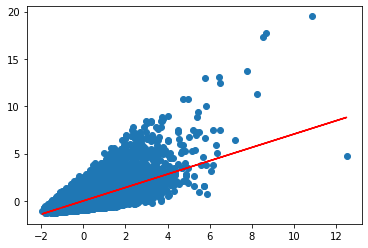

In [30]:
plt.plot(metros_escalados, precos_escalados, 'o')
plt.plot(metros_escalados, previsoes, color='red')

Para que consigamos calcular as métricas de erros, precisamos desnormalizar as previsões que fizermos, pois elas estão normalizadas.

In [32]:
previsoes_final = scaler_precos.inverse_transform(previsoes)
previsoes_final

array([[284912.00415189],
       [677608.38388458],
       [169080.6978998 ],
       ...,
       [239709.54317546],
       [403568.46421501],
       [239709.54317546]])

Agora podemos analisar os erros.


In [37]:
mae = mean_absolute_error(preco, previsoes_final)
mse = mean_squared_error(preco, previsoes_final)

print("Erro absoluto médio", mae)
print("Erro ao quadrado médio", mse)

Erro absoluto médio 173886.8828263359
Erro ao quadrado médio 68355190431.54337


Nota-se errar 173 mil pra cima ou pra baixo pode ser bem grande, então nas próximas abordagens iremos ver se esse erro pode ser reeduzido.
